In [1]:
#install pandas data reader

!pip install pandas-datareader

     |████████████████████████████████| 109 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 3.5 MB/s eta 0:00:01


In [7]:
! pip install matplotlib

     |████████████████████████████████| 7.3 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 601 kB/s eta 0:00:01
     |████████████████████████████████| 895 kB 2.8 MB/s eta 0:00:01


In [8]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [13]:
df_tesla.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-24,802.479980,700.000000,700.390015,800.770020,44876700.0,800.770020
2022-02-25,819.460815,782.400513,809.229980,813.400024,14126965.0,813.400024


<AxesSubplot:xlabel='Date'>

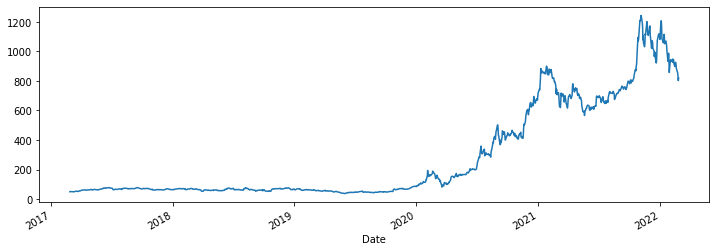

In [12]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

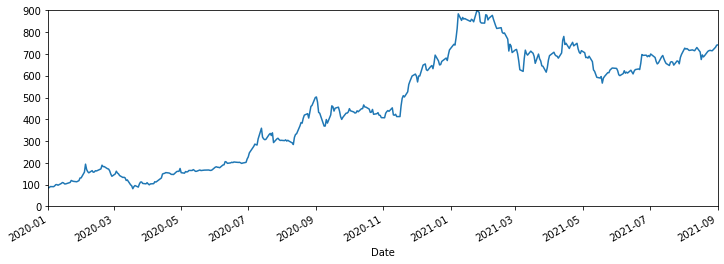

In [16]:
## xlimit and ylimit

df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

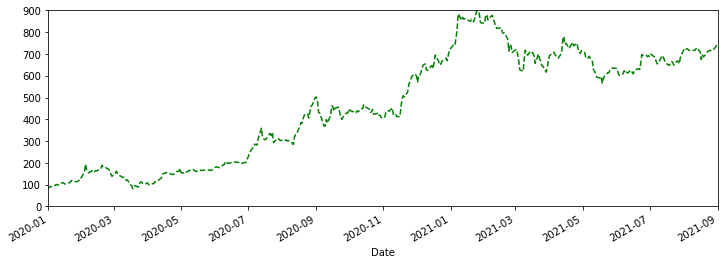

In [23]:
## xlimit and ylimit wit color

df_tesla['High'].plot(c='green',ls='--',xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

In [41]:
df_tesla.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [50]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index

share_open= df_tesla.loc['2020-01-01':'2021-09-01']['Open']

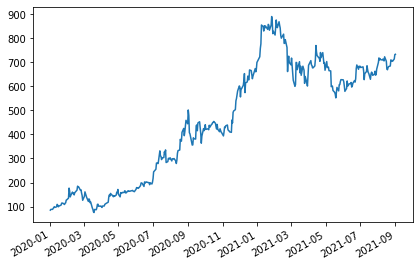

In [53]:
figure,axis = plt.subplots()
#Preventing overlapping of the dates in xaxis
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [55]:
#Datetime index

'''
Change the index from 'Date' to normal index
'''

df_tesla = df_tesla.reset_index()

In [56]:
'''
if the date field is in pandas object then convert to datetime:
--------------------------------
pd.to_datetime(df_tesla['Date'])
--------------------------------
'''

df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [65]:
datetime.now()

datetime.datetime(2022, 2, 25, 22, 59, 37, 968674)

In [85]:
now = datetime.now()
now.strftime("%d-%m-%Y")

'25-02-2022'

# Time Resampling

In [87]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
1,2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2,2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
3,2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
4,2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [88]:
df_tesla.set_index('Date',inplace=True)

In [89]:
df_tesla.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001


In [92]:
# rule 'A' -> year end frequence

df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,14126965.0,764.039978


<AxesSubplot:xlabel='Date'>

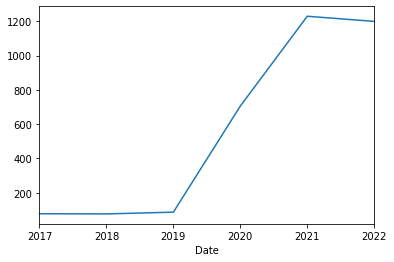

In [94]:
df_tesla.resample(rule='A').max()['Close'].plot()

In [95]:
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,56.400002,55.442001,55.745998,55.660000,57304000.0,55.660000
2017-04-01,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-01,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

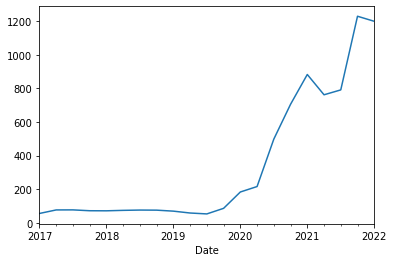

In [96]:
df_tesla.resample(rule='QS').max()['Close'].plot()

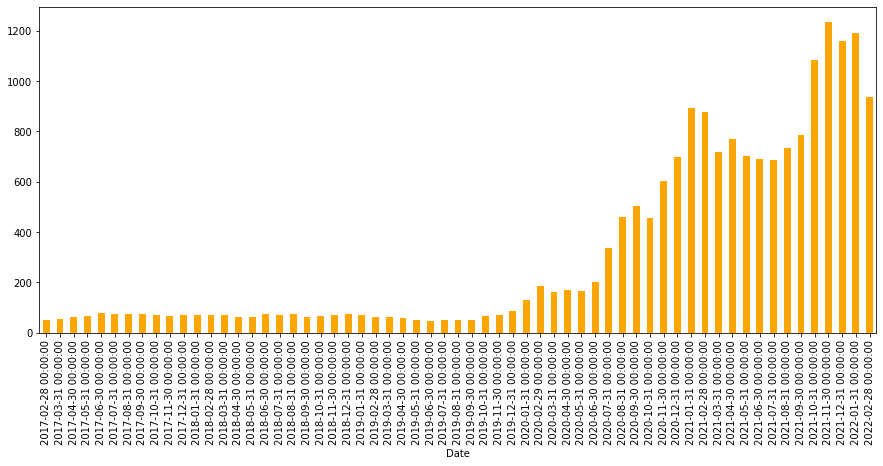

In [104]:

df_tesla.resample(rule='M').max()['Open'].plot(color='orange',kind='bar',figsize=(15,6))

figure.autofmt_xdate()

In [112]:
df_tesla['High'].head(20)

Date
2017-02-27    49.672001
2017-02-28    50.200001
2017-03-01    50.970001
2017-03-02    50.655998
2017-03-03    50.380001
2017-03-06    50.340000
2017-03-07    50.778000
2017-03-08    50.014000
2017-03-09    49.731998
2017-03-10    49.299999
2017-03-13    49.369999
2017-03-14    51.624001
2017-03-15    52.200001
2017-03-16    53.150002
2017-03-17    53.066002
2017-03-20    52.910000
2017-03-21    52.959999
2017-03-22    51.014000
2017-03-23    51.534000
2017-03-24    52.778000
Name: High, dtype: float64

In [106]:
df_tesla['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [110]:
df_tesla['High'].rolling(5).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03    50.375600
2017-03-06    50.509200
2017-03-07    50.624800
2017-03-08    50.433600
2017-03-09    50.248800
2017-03-10    50.032800
2017-03-13    49.838799
2017-03-14    50.007999
2017-03-15    50.445200
2017-03-16    51.128800
2017-03-17    51.882001
2017-03-20    52.590001
2017-03-21    52.857201
2017-03-22    52.620000
2017-03-23    52.296800
2017-03-24    52.239200
Name: High, dtype: float64

In [116]:
df_tesla['Open - 30 Days Rolling'] = df_tesla['Open'].rolling(30).mean()

In [117]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open - 30 Days Rolling
Date,,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998,NaN
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,NaN
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,NaN
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,NaN
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,NaN


<AxesSubplot:xlabel='Date'>

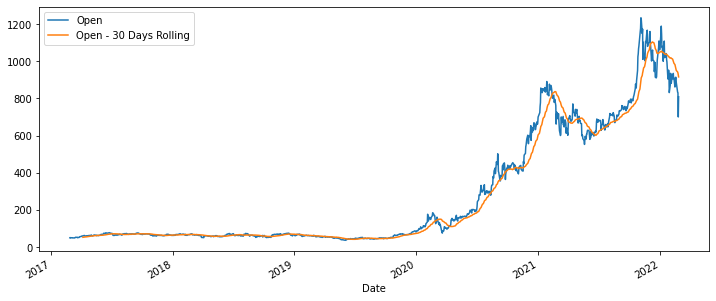

In [119]:
df_tesla[['Open','Open - 30 Days Rolling']].plot(figsize=(12,5))